LINEAR REGRESSION - USE CASE1- Boston Housing

In [1]:
### import libraries
import numpy as np
import pandas as pd

### data visualization
import matplotlib.pyplot as plt
import seaborn as sns   #### for better and crisp visualization

In [10]:
### import scikit learn dataset
#### to get a list of all datsets in sklear, take the cursor to end of "load" and press tab
from sklearn.datasets import load_boston

In [7]:
### create an object to instantiate the dataset
bos2 = load_boston()

In [8]:
print(bos2['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [2]:
%matplotlib inline
#plt.show()

In [11]:
#### read from file and save to data frame bos1

bos1 = pd.read_csv('BostonHousing.csv')
print(bos1)

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12    0.09378  12.5   7.8

DATA EXPLORATION - Explore the Raw dataset using built in methods

In [19]:
bos1.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [12]:
### check top few records of dataframe
bos1.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [14]:
### check bottom few records of dataframe
bos1.tail()


crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          b  lstat  medv  
501  391.99   9.67  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9

In [22]:
### understand the structure of the dataset.
bos1.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [23]:
bos1.describe().transpose()

count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
b        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
lstat    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
medv     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
crim       3.677082   88.9762  
zn        12.500000  100.0000  
indus     18.100000   27.7400  
chas       0.000000    1.0000  
nox        0.624000    0.8710  
rm         6.623500    8.7800  
age       94.075000  100.0000  
dis        5.188425   12.1265  
rad       24.000000   24.0000  
tax      666.000000  711.0000  
ptratio   20.200000   22.0000  
b        396.225000  396.9000  
lstat     16.955000   37.9700  
medv      25.000000   50.0000

In [15]:
#### know the column names
bos1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
#### use seaborn's pairplot function on the entire data frame. 
### creates histograms and correlation scatter plots


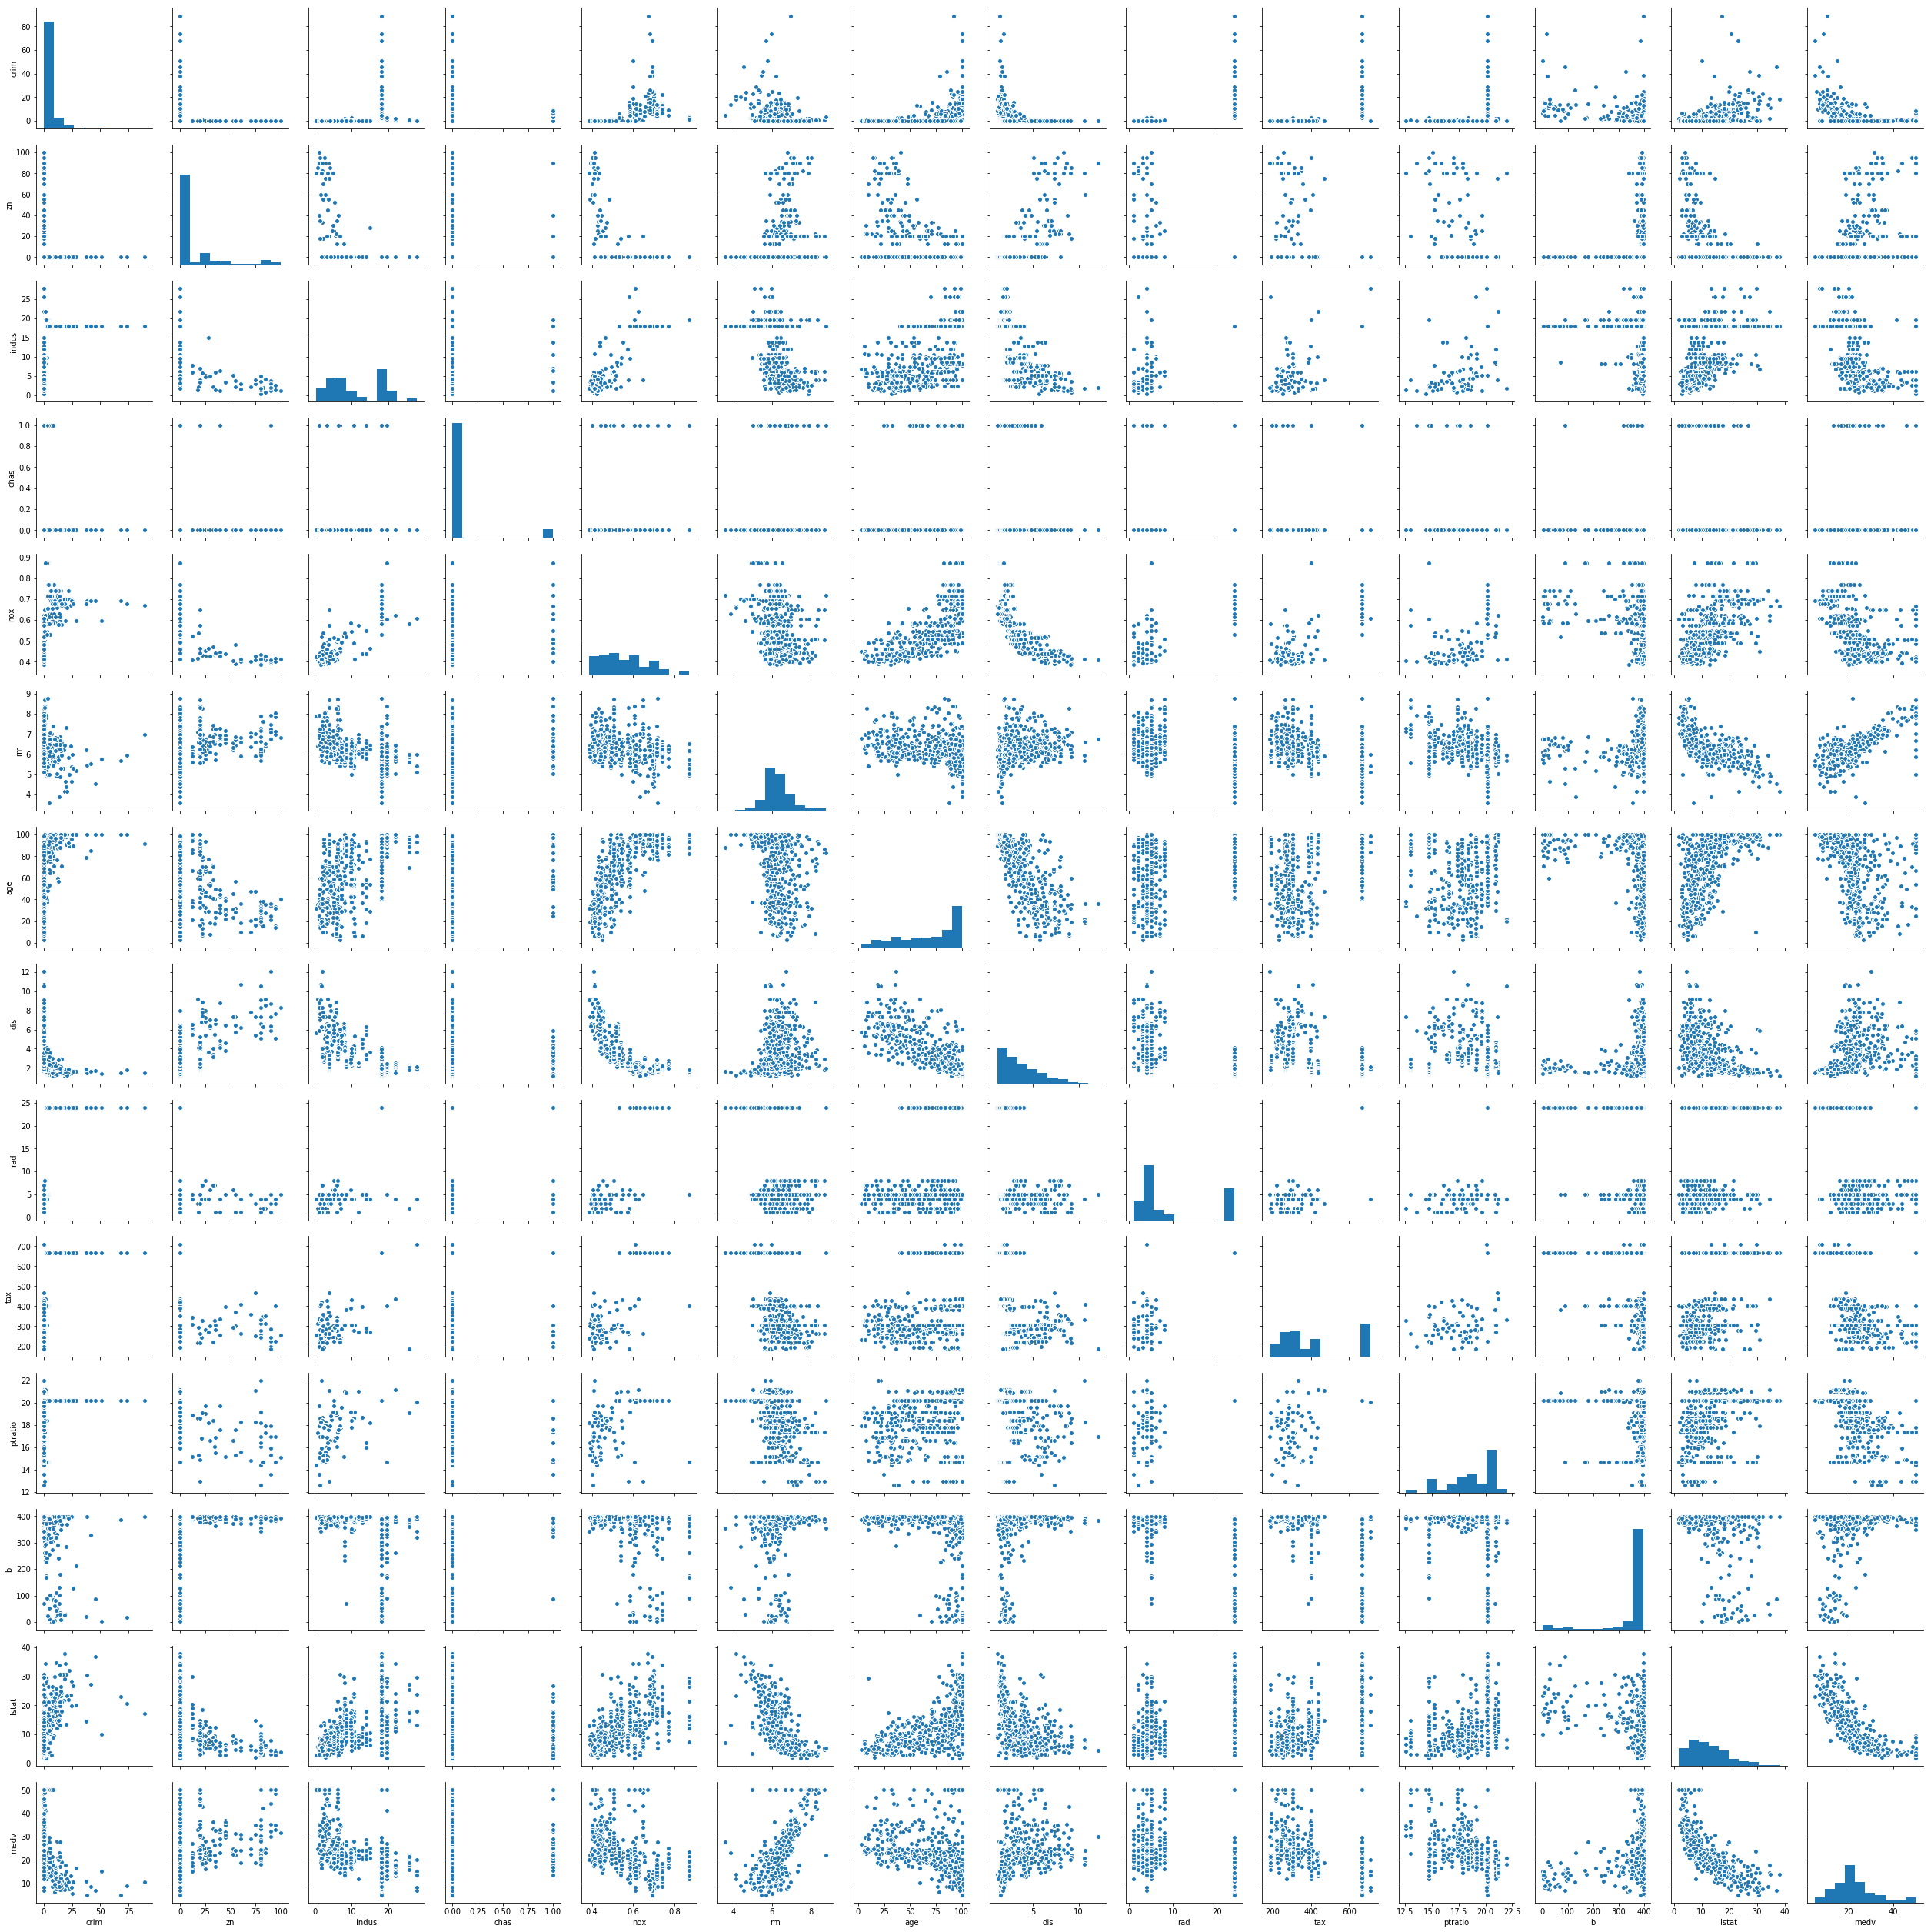

In [25]:
sns.pairplot(bos1)

In [26]:
sns.pairplot(bos1[])

SyntaxError: invalid syntax (<ipython-input-26-028cfcbe0259>, line 1)

In [ ]:
bos1_slice1 = bos1.iloc[:,0:5]
bos1_slice1

##bos1_slice3 = bos1.iloc[:,10:13]

In [ ]:
bos1_slice2 = bos1.iloc[:,5:10] 
bos1_slice2 

In [ ]:
bos1_slice3 = bos1.iloc[:,10:14] 
bos1_slice3 

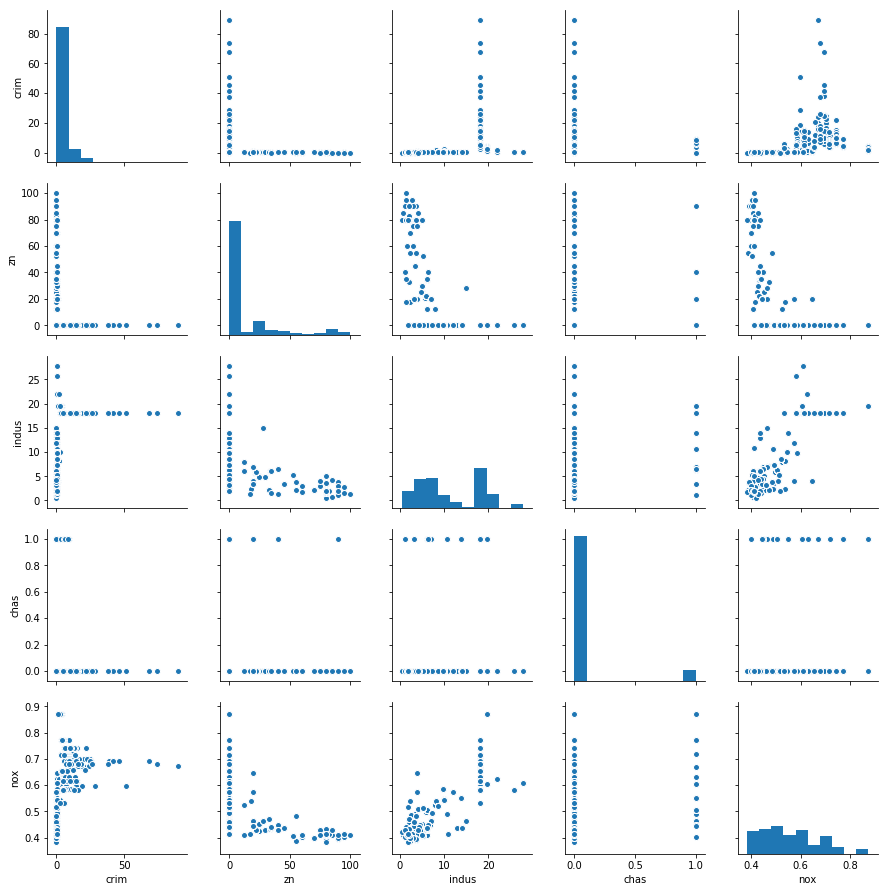

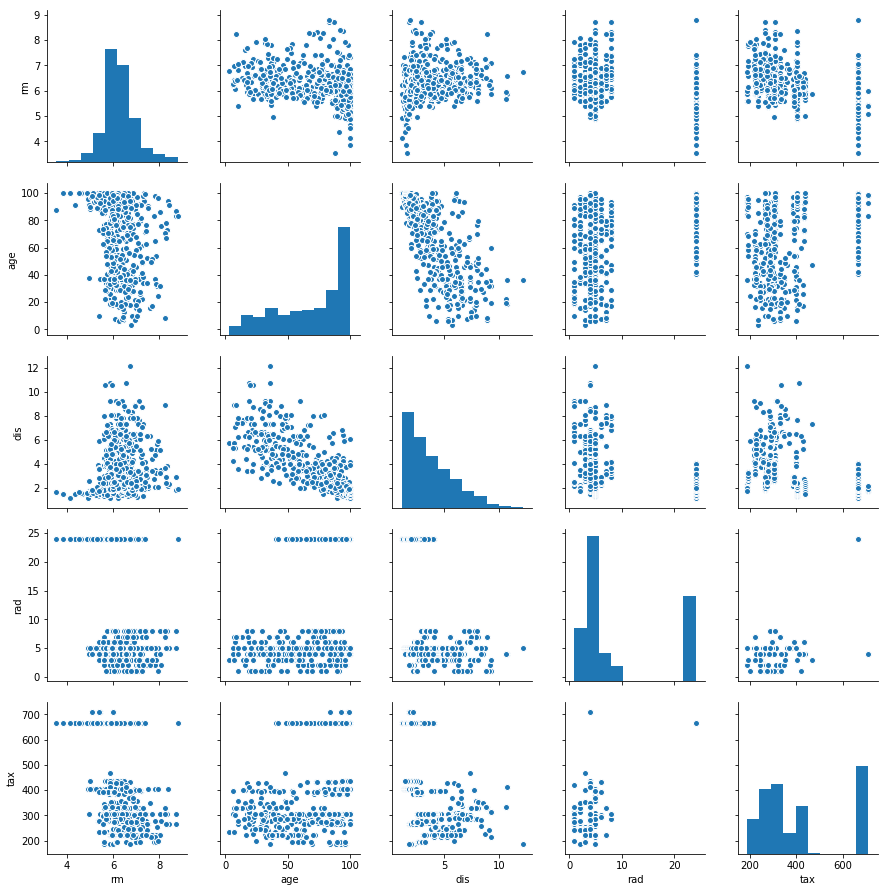

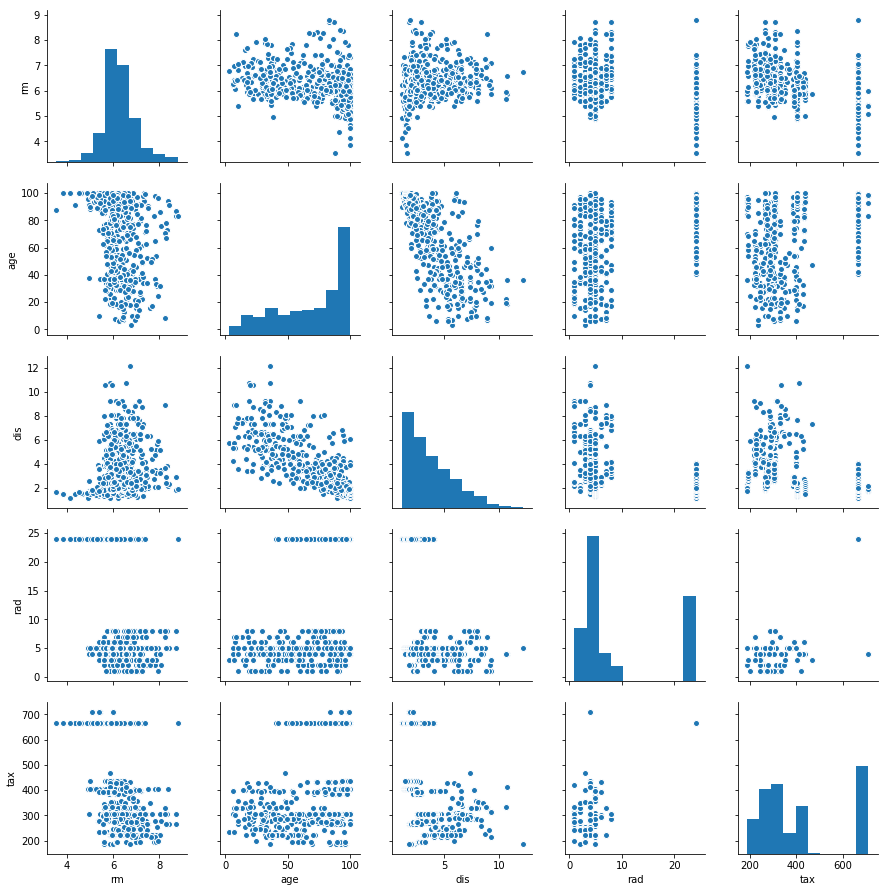

In [12]:
sns.pairplot(bos1_slice1)
sns.pairplot(bos1_slice2)
sns.pairplot(bos1_slice2)





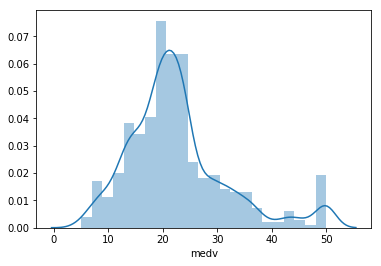

In [16]:
###check the distribution of the dependent variable medv
sns.distplot(bos1['medv'])


#### observe that the distribution seems to be close to normal.

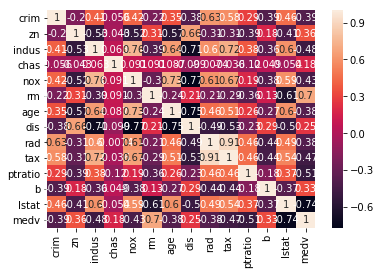

In [20]:
### create correlation heat map
##ns.heatmap(bos1.corr())
sns.heatmap(bos1.corr(),annot=True)  ### gives correlation value

In [ ]:
bos1.columns

In [25]:
### DEFINE THE INDEPENDENT VARIABLES
x= bos1[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
##x = bos1.iloc[:,0:13]  

### DEFINE THE DEPENDENT VARIABLE
y = bos1["medv"]

In [26]:
#### split the data into training and testing data using sci kit learn
from sklearn.cross_validation import train_test_split

In [28]:
#testing data size is of 33% of entire data
### test size = % of dataset to be allocated as test dataset
### random_state ensures a specific set of random splits on data as the train test split is going to be random
### x_train, x_test, y_train, y_test 
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)

In [29]:
### training the model
from sklearn.linear_model import LinearRegression




In [35]:
#fitting our model to train and test
### instantiate an instance of linear regression object
#### fit is used for fitting the model to training data . only on training data

lm = LinearRegression()
lm.fit(x_train,y_train) #### no need to set this to any variable. its inplace.

#### we get an output stating that the linear regression model has been trained

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
### linear equation y = ax + b 
## y is dependent variable
### x is independent variable
### a is the slope 
### b is intercept

In [36]:
#### let us print the intercept
print(lm.intercept_) 


32.85893263408479


In [37]:
### to view the coefficients of the linear model- my independent variables
lm.coef_

array([-1.56381297e-01,  3.85490972e-02, -2.50629921e-02,  7.86439684e-01,
       -1.29469121e+01,  4.00268857e+00, -1.16023395e-02, -1.36828811e+00,
        3.41756915e-01, -1.35148823e-02, -9.88866034e-01,  1.20588215e-02,
       -4.72644280e-01])

In [34]:
### create a data frame of coefficients
x_train.columns
pd.DataFrame(data=lm.coef_,index=x.columns,columns=['Coeffecients'])




Coeffecients
crim        -0.156381
zn           0.038549
indus       -0.025063
chas         0.786440
nox        -12.946912
rm           4.002689
age         -0.011602
dis         -1.368288
rad          0.341757
tax         -0.013515
ptratio     -0.988866
b            0.012059
lstat       -0.472644

#### interpreting the coefficient
### coefficents help form the linear equations as below
linear regression equation  estimated y or predicted y = bx1 + b2x2+b2x3+b4x4.....+b13x13+a . 

b is the slope and a is the intercept 

From the output of our coefficients above, we can arrive at the following equation and interpretation

y (median value of price) = (-0.156381) * (value of crim)         + 
                            (0.038549) * (value of zn)            +
                            (-0.025063) * (value of indus)        +
                            (0.786440)  * (value of chas)         +
                            (-12.946912) * (value of nox)         + 
                            (4.002689)  *  (value of rm)          +  
 	                        (-0.011602) * (value of age)          + 
                            (-1.368288) * (value of dis)          +
                            (0.341757)  * (value of rad)          +
                            (-0.013515) * (value of tax)          + 
                            (-0.988866)  *  (value of ptratio)    +  
 	                        (0.012059) * (value of b)             + 
                            (-0.472644) * (value of lstat)        + 
                           a  (which is the value of intercept)
                           
                           
BUSINESS INTERPRETATION

- FOR 1 UNIT INCREASE IN "CRIM" WILL RESULT IN A CHANGE OF -0.156381 IN MEDV (MEDIAN VALUE OF PRICE)
- FOR 1 UNIT INCREASE IN "ZN"   WILL RESULT IN A CHANGE OF 0.038549 IN MEDV (MEDIAN VALUE OF PRICE) 

ETC ...
 

PREDICTIONS

Predictions are done using the Model (That was built with training data) and running it on the test data.
 - If the predicted value of Dependent variable (In our use case "MEDV") is closer to the actual value of dependent variable
     we have a good model
        
        

In [38]:
pred_y = lm.predict(x_test)

Text(0,0.5,'Predicted Y')

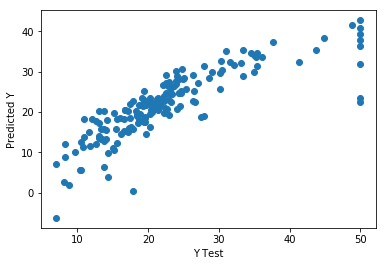

In [39]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test') 
plt.ylabel('Predicted Y')

In [57]:
### residuals or errors - difference between actual values and the predicted values of dependent variable ("MEDV")
### We can do a distribution plot on residuals

sns.distplot((y_test-pred_y))

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:


- **MAE** is the easiest to understand, because it's the average error. 
          Take your error, take the absolute value and get an average
          
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
          More useful in real world. takes into account larger errors as its squaring the errors 

- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
           

All of these are **loss functions**, because we want to minimize them. to get the best model , all these errors have to be less

In [40]:
from sklearn import metrics

In [41]:
metrics.mean_absolute_error(y_test,pred_y)

3.4550349322483784

In [42]:
#### MEAN SQUARED ERROR
metrics.mean_squared_error(y_test,pred_y)

28.530458765974423

In [43]:
#### RMSE
np.sqrt(metrics.mean_squared_error(y_test,pred_y))

5.341391089030499

Drawing Business Conclusionss

Based off of MAE, MSE and RMSE, we can improve our model by minizing the values of these 3 parameters.


In [51]:
### calculate variance. Closer the value is to 1 ,  higher is the model accuracy
lm.score(x_test,y_test)

0.6956551656111625